In [1]:
# Re-import necessary libraries as execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a synthetic dataset of customer transactions
np.random.seed(42)
num_customers = 200
num_transactions = 1000

In [3]:
# Generate random customer IDs
customer_ids = [f"CUST{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# Generate random transaction data
data = []
for _ in range(num_transactions):
    customer_id = np.random.choice(customer_ids)
    transaction_date = pd.Timestamp("2024-01-01") + pd.to_timedelta(np.random.randint(0, 90), unit='D')
    transaction_amount = round(np.random.uniform(5, 500), 2)
    data.append([customer_id, transaction_date, transaction_amount])

In [4]:
# Create DataFrame
df = pd.DataFrame(data, columns=["Customer_ID", "Transaction_Date", "Transaction_Amount"])

# Ensure data is sorted
df = df.sort_values(by=["Customer_ID", "Transaction_Date"])

In [5]:
# 1. Classify High-Spending vs Occasional Customers
customer_spending = df.groupby("Customer_ID")["Transaction_Amount"].sum().reset_index()
customer_spending["Customer_Type"] = np.where(customer_spending["Transaction_Amount"] > 2000, "High-Spender", "Occasional")

In [6]:
# 2. Identify Customer Buying Patterns (Avg Transactions per Month)
df["Month"] = df["Transaction_Date"].dt.to_period("M")
customer_monthly_purchases = df.groupby(["Customer_ID", "Month"]).size().reset_index(name="Transactions_Per_Month")
avg_transactions_per_month = customer_monthly_purchases.groupby("Customer_ID")["Transactions_Per_Month"].mean().reset_index()
avg_transactions_per_month.columns = ["Customer_ID", "Avg_Transactions_Per_Month"]

In [7]:
# 3. Find VIP Customers for Marketing Campaigns (Top 10% Spenders)
vip_threshold = customer_spending["Transaction_Amount"].quantile(0.90)
customer_spending["VIP_Customer"] = np.where(customer_spending["Transaction_Amount"] >= vip_threshold, 1, 0)

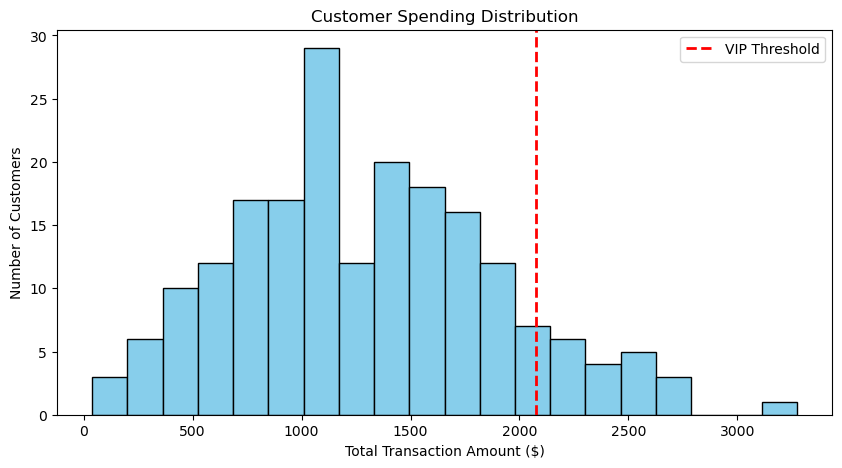

In [8]:
# Merge the classifications into the main dataset
customer_analysis = customer_spending.merge(avg_transactions_per_month, on="Customer_ID")

# Plot Spending Distribution
plt.figure(figsize=(10, 5))
plt.hist(customer_spending["Transaction_Amount"], bins=20, color="skyblue", edgecolor="black")
plt.axvline(vip_threshold, color='red', linestyle='dashed', linewidth=2, label="VIP Threshold")
plt.xlabel("Total Transaction Amount ($)")
plt.ylabel("Number of Customers")
plt.title("Customer Spending Distribution")
plt.legend()
plt.show()

In [9]:
df

,Customer_ID,Transaction_Date,Transaction_Amount,Month
602,CUST0001,2024-02-04,228.84,2024-02
344,CUST0001,2024-02-15,121.77,2024-02
520,CUST0001,2024-02-27,447.58,2024-02
146,CUST0001,2024-03-09,343.56,2024-03
793,CUST0002,2024-01-29,344.22,2024-01
...,...,...,...,...
760,CUST0200,2024-02-18,308.90,2024-02
686,CUST0200,2024-02-19,341.67,2024-02
194,CUST0200,2024-03-01,412.28,2024-03
986,CUST0200,2024-03-01,358.45,2024-03
